In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/My Drive/dataset/survei2022.csv')
data.head(10)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
5,6,"I am not primarily a developer, but I write co...","Student, full-time",NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
6,7,I code primarily as a hobby,"Student, part-time",NaN,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Stack Overflow;Video-based Online Courses,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
7,8,I am a developer by profession,"Not employed, but looking for work",NaN,NaN,Some college/university study without earning ...,Online Courses or Certification,NaN,Coursera;Udemy,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
8,9,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Coding Bootcamp,NaN,NaN,6,...,15-30 minutes a day,Over 120 minutes a day,Somewhat long,Innersource initiative;DevOps function;Microse...,Yes,Yes,Yes,Appropriate in length,Easy,49056.0
9,10,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Fully remote,Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN


In [4]:
data.shape

(73268, 79)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

# Exploratory Data Analysis (EDA)

In [6]:
data = data[['Country','EdLevel','YearsCodePro','Employment','ConvertedCompYearly']]
data.head()

,Country,EdLevel,YearsCodePro,Employment,ConvertedCompYearly
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


In [7]:
data.rename(columns={'ConvertedCompYearly':'Salary'},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
data.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


In [9]:
data.isnull().sum()

Country          1497
EdLevel          1697
YearsCodePro    21435
Employment       1559
Salary          35197
dtype: int64

In [10]:
data = data.dropna()

In [11]:
data.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [12]:
data.shape

(37919, 5)

From = (73268, 79)

To = (37919, 5)

=SUM(73268 - 37919)

=35.349

##Unique Kolom

In [13]:
data['Country'].value_counts()

United States of America                                8684
Germany                                                 2901
United Kingdom of Great Britain and Northern Ireland    2649
India                                                   2154
Canada                                                  1478
                                                        ... 
Fiji                                                       1
Palau                                                      1
Monaco                                                     1
Saint Lucia                                                1
Seychelles                                                 1
Name: Country, Length: 159, dtype: int64

In [14]:
data['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          17992
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        9846
Some college/university study without earning a degree                                 4482
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1771
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1360
Associate degree (A.A., A.S., etc.)                                                    1267
Professional degree (JD, MD, etc.)                                                      620
Something else                                                                          358
Primary/elementary school                                                               223
Name: EdLevel, dtype: int64

In [15]:
data['YearsCodePro'].value_counts()

3                     3135
5                     3095
4                     2892
2                     2805
10                    2462
6                     2417
7                     2129
8                     2036
1                     1870
Less than 1 year      1379
15                    1314
12                    1296
9                     1254
11                    1064
20                     958
14                     805
13                     702
16                     665
22                     656
18                     578
25                     574
17                     549
30                     345
24                     329
23                     323
21                     305
19                     274
26                     222
27                     189
28                     174
35                     163
32                     151
40                      90
31                      84
29                      80
36                      77
33                      75
3

In [16]:
data['Employment'].value_counts()

Employed, full-time                                                                             31382
Independent contractor, freelancer, or self-employed                                             2739
Employed, full-time;Independent contractor, freelancer, or self-employed                         2633
Employed, part-time                                                                               632
Independent contractor, freelancer, or self-employed;Employed, part-time                          207
Employed, full-time;Employed, part-time                                                           151
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      118
I prefer not to say                                                                                27
Retired                                                                                            18
Employed, part-time;Retired                                                       

## Salary Based on Country

In [17]:
def shortCategory(categories,cutoff):
    categorical_map={}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            categorical_map[categories.index[i]] =categories.index[i]
        else:
             categorical_map[categories.index[i]]='Other'
    return categorical_map

In [18]:
country_map = shortCategory(data.Country.value_counts(),400)
data['Country'] = data['Country'].map(country_map)
data.Country.value_counts()

Other                                                   10328
United States of America                                 8684
Germany                                                  2901
United Kingdom of Great Britain and Northern Ireland     2649
India                                                    2154
Canada                                                   1478
France                                                   1372
Brazil                                                   1279
Spain                                                     992
Poland                                                    973
Netherlands                                               897
Australia                                                 830
Italy                                                     807
Sweden                                                    664
Russian Federation                                        533
Switzerland                                               520
Turkey  

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<function matplotlib.pyplot.show(*args, **kw)>

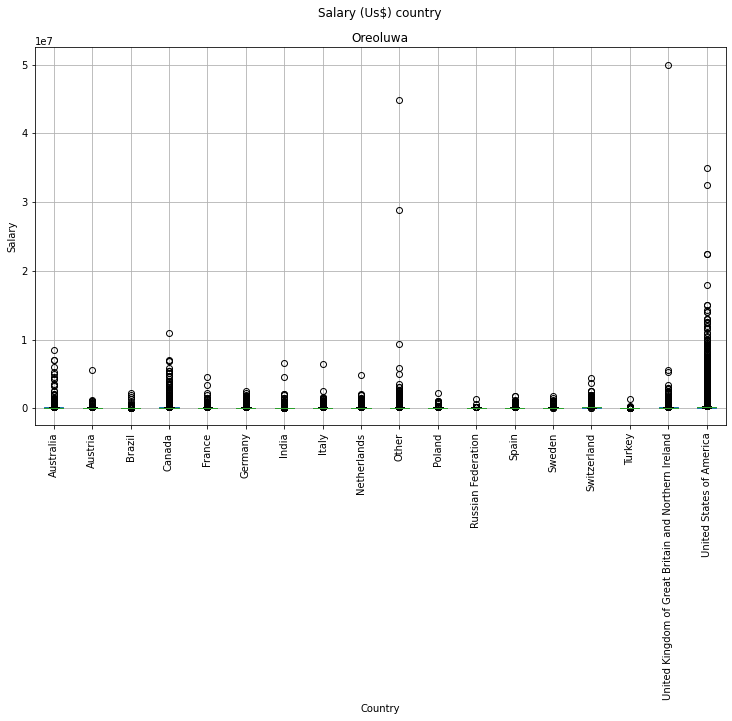

In [19]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
data.boxplot('Salary','Country',ax = ax)
plt.suptitle('Salary (Us$) country')
plt.title('Oreoluwa')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show

In [20]:
data = data[(data.Salary >= 0) & (data.Salary < 1000000)]

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<function matplotlib.pyplot.show(*args, **kw)>

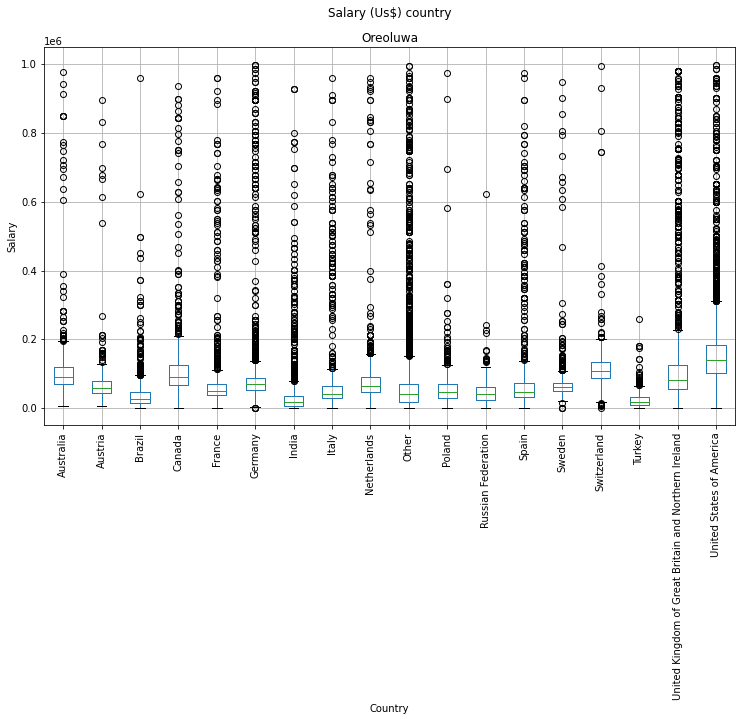

In [21]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
data.boxplot('Salary','Country',ax = ax)
plt.suptitle('Salary (Us$) country')
plt.title('Oreoluwa')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show

## Years Code Pro

In [22]:
data['YearsCodePro'].unique()

array(['5', '17', '6', '2', '10', '4', '22', '20', '9', '14', '21', '15',
       '3', '25', '7', '8', '12', '19', '1', '24', '11', '23', '45',
       'Less than 1 year', '18', '40', '37', '46', '13', '32', '31', '39',
       '27', '28', '16', '26', '30', '34', '35', '29', '42', '38', '36',
       '43', '41', '44', '48', '33', 'More than 50 years', '50', '47',
       '49'], dtype=object)

In [23]:
data['YearsCodePro'].value_counts()

3                     3077
5                     3041
4                     2845
2                     2768
10                    2395
6                     2370
7                     2091
8                     1988
1                     1836
Less than 1 year      1363
15                    1267
12                    1260
9                     1224
11                    1031
20                     922
14                     784
13                     692
16                     650
22                     630
25                     558
18                     557
17                     535
30                     334
24                     318
23                     306
21                     301
19                     263
26                     211
27                     186
28                     167
35                     156
32                     142
40                      88
31                      79
29                      78
36                      75
33                      72
3

In [24]:
def experience(x):
    if x== 'More than 50 years':
      return 50
    if x== 'Less than 1 year':
      return 0.5
    return float (x)
data['YearsCodePro']= data['YearsCodePro'].apply(experience)

In [25]:
data['YearsCodePro']

2         5.0
3        17.0
8         6.0
10        2.0
11       10.0
         ... 
73116    16.0
73118     3.0
73119     1.0
73120     2.0
73121     3.0
Name: YearsCodePro, Length: 37050, dtype: float64

In [26]:
data['YearsCodePro'].nunique()

51

In [27]:
data['YearsCodePro'].unique()

array([ 5. , 17. ,  6. ,  2. , 10. ,  4. , 22. , 20. ,  9. , 14. , 21. ,
       15. ,  3. , 25. ,  7. ,  8. , 12. , 19. ,  1. , 24. , 11. , 23. ,
       45. ,  0.5, 18. , 40. , 37. , 46. , 13. , 32. , 31. , 39. , 27. ,
       28. , 16. , 26. , 30. , 34. , 35. , 29. , 42. , 38. , 36. , 43. ,
       41. , 44. , 48. , 33. , 50. , 47. , 49. ])

## EdLevel

In [28]:
data['EdLevel'].nunique()

9

In [29]:
data['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [30]:
def education(x):
    if 'Bachelor’s degree'in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree'in x or  'Other doctoral degree' in x:
        return 'Post grad'
    return 'Less than a bachelor'
    
data['EdLevel']= data['EdLevel'].apply(education)

In [31]:
data['EdLevel'].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a bachelor',
       'Post grad'], dtype=object)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()

data['EdLevel'] = le.fit_transform(data['EdLevel'])

In [34]:
data['EdLevel'].value_counts()

0    17539
2     9653
1     7918
3     1940
Name: EdLevel, dtype: int64

### LABEL ENCODER COUNTRY

In [35]:
leCountry = LabelEncoder()
data['Country'] = leCountry.fit_transform(data['Country'])

In [36]:
data['Country'].value_counts()

9     10238
17     8221
5      2863
16     2570
6      2143
3      1420
4      1362
2      1275
12      985
10      969
8       884
7       796
0       795
13      659
11      532
14      485
15      445
1       408
Name: Country, dtype: int64

In [37]:
data.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,16,2,5.0,"Employed, full-time",40205.0
3,9,0,17.0,"Employed, full-time",215232.0
8,8,2,6.0,"Employed, full-time",49056.0
10,16,0,2.0,"Employed, full-time",60307.0
11,17,0,10.0,"Employed, full-time;Independent contractor, fr...",194400.0


In [38]:
data = data.drop(columns='Employment')

In [39]:
data.head(10)

,Country,EdLevel,YearsCodePro,Salary
2,16,2,5.0,40205.0
3,9,0,17.0,215232.0
8,8,2,6.0,49056.0
10,16,0,2.0,60307.0
11,17,0,10.0,194400.0
12,17,0,5.0,65000.0
14,17,2,5.0,110000.0
16,9,0,4.0,19224.0
17,1,2,10.0,202623.0
18,1,1,22.0,51192.0


In [46]:
data.to_csv('cleanSalary.csv')